In [1]:
import sys
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from util_func import *

if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

## Excercise 1
Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.

In [31]:
img = cv.imread('images/pineapple.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_copy = gray.copy()

ret, img_ppap = cv.threshold(gray, 200, 255, cv.THRESH_BINARY_INV)

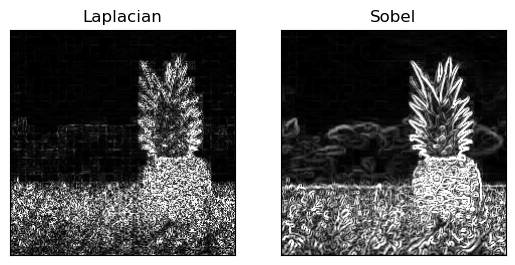

In [37]:
#LOG
#blur = cv.GaussianBlur(img_copy, (3, 3), 0)

#Laplacian
laplacian = cv.Laplacian(img_copy, cv.CV_32F, ksize=3)
laplacian = cv.convertScaleAbs(laplacian)

plt.subplot(121), plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

#Laplacian: result lacking, blurry edges

#Sobel
sobelx = cv.Sobel(img_copy, cv.CV_32F, 1, 0, ksize=3)
sobely = cv.Sobel(img_copy, cv.CV_32F, 0, 1, ksize=3)

gradient = cv.magnitude(sobelx, sobely)
sobel = cv.convertScaleAbs(gradient)


plt.subplot(122), plt.imshow(sobel, cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

#Sobel:show best edges among four exclude Canny

plt.show()

225
225


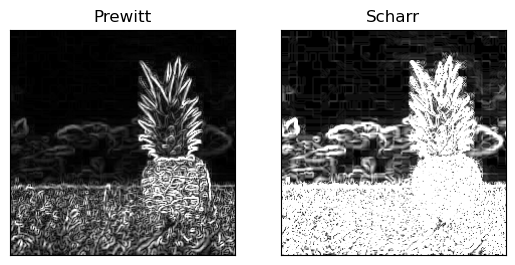

In [33]:
#Prewitt
axis_x = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
axis_y = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

edgesx = cv.filter2D(img_copy, cv.CV_32F, axis_x)
edgesy = cv.filter2D(img_copy, cv.CV_32F, axis_y)

gradient = cv.magnitude(edgesx, edgesy)
prewitt = cv.convertScaleAbs(gradient)

plt.subplot(121), plt.imshow(prewitt, cmap = 'gray')
plt.title('Prewitt'), plt.xticks([]), plt.yticks([])

#Prewitt: show clear edges

#Scharr, default is 3
scharrx = cv.Scharr(img_copy, cv.CV_32F, 1, 0)
scharry = cv.Scharr(img_copy, cv.CV_32F, 0, 1)

gradient = cv.magnitude(scharrx, scharry)
scharr = cv.convertScaleAbs(gradient)

plt.subplot(122), plt.imshow(scharr, cmap = 'gray')
plt.title('Scharr'), plt.xticks([]), plt.yticks([])

#Scharr: edges more clear but messy

plt.show()

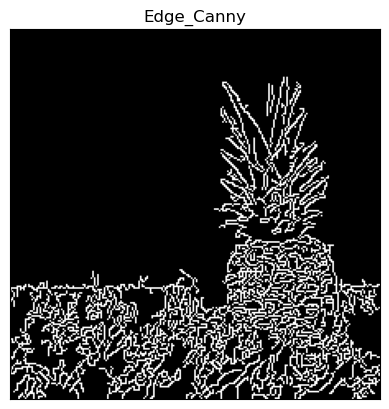

In [5]:
#Canny
edges = cv.Canny(img_copy, 50, 400)  #default is 3

plt.imshow(edges, cmap='gray')
plt.title('Edge_Canny')
plt.xticks([])
plt.yticks([])
plt.show()

## Excercise 2
Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw bounding boxes on the objects.

In [6]:
image= cv.imread('images/electronic.jfif')

In [7]:
image_copy = image.copy()

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv.Canny(gray, 200, 400) 

# Find contours in the edges image
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Iterate through the contours and draw bounding boxes
for c in contours:
    x, y, w, h = cv.boundingRect(c)
    
    # Filter out small regions
    if w > 80 and h > 80:
        cv.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes
show_img('Object Detection', image_copy)

## Excercise 3
Isolate the clock with the aid of edge detection and contours' properties.

In [8]:
def auto_canny(img, method, sigma=0.33):
    """Args:
    img: grayscale image
    method: median, otsu, triangle
    sigma:0.33 (default)"""
    if method == "median":
        Th = np.median(img)
        
    elif method == "otsu":
        Th = cv.threshold(img, 0, 255, cv.THRESH_OTSU)[0]
        
    elif method == "triangle":
        Th = cv.threshold(img, 0, 255, cv.THRESH_TRIANGLE)[0]
        
    else:
        raise Exception("Method specified unavailable")
        
    lowTh = (1-sigma) * Th
    highTh = (1+sigma) * Th
    
    return cv.Canny(img, lowTh, highTh)

In [9]:
img = cv.imread('images/clock.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.bilateralFilter(gray, 7, 19, 13)
edge = auto_canny(blur, method="triangle")

#show_img("edge", edge)

In [10]:
contours, _ = cv.findContours(edge, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# area
contours = sorted(contours, key=cv.contourArea, reverse=True)[:5]
screen = None
img_copy = img.copy()

for c in contours:
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.1*peri, True)
    
    if len(approx)==4:
        screen = c
        break
        
cv.drawContours(img_copy, [screen], -1, (0, 0, 255), 2)
show_img("screen", img_copy)